In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from urllib.request import urlopen
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
import time 
from konlpy.tag import Okt
import pandas as pd
import re
from tqdm import trange, notebook

In [3]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')

# 서울캠 크롤링

In [3]:
baseUrl = "https://everytime.kr/377398/all/"
plusUrl = input("검색할 태그를 입력하세요 : ")

url = baseUrl + quote_plus(plusUrl)

driver = webdriver.Chrome("../docs/chromedriver_win32/chromedriver")
driver.get('https://everytime.kr/login')

#크롤링 할 홈페이지 가져오기
driver.find_element_by_name("userid").send_keys("minzilov")
#태그의 네임이 userid 인 element 가져오고 "내 아이디" 입력

driver.find_element_by_name("password").send_keys("rnrmf35")
#태그의 네임이 password 인 element 가져오고 "비밀번호" 입력

driver.find_element_by_tag_name("input").send_keys(Keys.RETURN)
#로그인 버튼 찾고 클릭

# 로그인 완료

driver.get(url) # 로그인 후 인문게시판에서 코로나 검색어 1페이지 이동

time.sleep(3)
    
html = driver.page_source
soup = BeautifulSoup(html)


everyTime=[]

driver.find_element_by_xpath('//*[@id="sheet"]/ul/li[3]/a').click()

for page_roof in notebook.tqdm(range(62)):
    res = driver.page_source
    soup = BeautifulSoup(res,"html.parser")
    header = soup.select('#container > div.wrap.articles > article > a > h2')
    vote = soup.select('.vote')
    comment = soup.select('.comment')
    text = soup.select('#container > div.wrap.articles > article > a > p')
    date = soup.select('#container > div.wrap.articles > article > a > time')
    driver.find_element_by_css_selector('#container > div.wrap.articles > div.pagination > a.next').click()
    time.sleep(0.8)

    for vote,comment,date,header,text in zip(vote,comment,date,header,text):
         everyTime.append([int(vote.get_text()),int(comment.get_text()),"2020/"+date.get_text(),header.get_text(), text.get_text()])
        
driver.close()

검색할 태그를 입력하세요 : 


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="sheet"]/ul/li[3]/a"}
  (Session info: chrome=86.0.4240.193)


In [8]:
df = pd.DataFrame(everyTime)
df

,0,1,2,3,4
0,1,8,2020/6분 전,나만 코로나 안무섭냐,한 9월 초까지만해도 친구들만날때 마스크 안쓰고 나가다가 친구들이 야 너 그러다 사...
1,0,0,2020/10분 전,코로나 확산세인가봐,나 본가 이제야 확진자 20번대 진입할 정도로 완전 지방인데 어제오늘 사이 5명 ...
2,0,2,2020/11/19 17:23,오우 학교에서 코로나 문자왔네,근데 진짜 신촌지역 웬만해서 오지마 진심으로. 위험함
3,0,0,2020/11/19 16:58,시발 lms 언제되는데;;,코로나 심해지는데 학교에서는 걍 대면시험 친대고 LMS 서버랑 학교 홈페이지는 심심...
4,0,4,2020/11/19 15:14,서강대도 코로나 터졌네..,신촌 무섭다
...,...,...,...,...,...
1228,3,16,2020/02/01 18:42,중국인 입국금지,주변나라는 입국금지 하는데 왜 인접국인 한국은 입국금지를 안할까 시간 질질 끌다 우...
1229,0,6,2020/01/29 08:10,신종 코로나 바이러스 청원,https://www1.president.go.kr/petitions/Temp/gu...
1230,0,0,2020/01/27 23:16,중국에 여행 가보고 싶네요,이번 코로나 바이러스 사태가 해결되면 하얼빈이나 상하이로 놀러가고 싶음 ㅎ
1231,0,2,2020/01/27 19:55,코로나바이러스,사람 간 전염 가능인데 그냥 옆에만 있어도 전염된다는거?


In [10]:
df.to_csv("../data/everytime_seoul.csv")

# 용인캠 크롤링

In [12]:
baseUrl = "https://everytime.kr/377399/all/"
plusUrl = input("검색할 태그를 입력하세요 : ")

url = baseUrl + quote_plus(plusUrl)

driver = webdriver.Chrome("../docs/chromedriver_win32/chromedriver")
driver.get('https://everytime.kr/login')

#크롤링 할 홈페이지 가져오기
driver.find_element_by_name("userid").send_keys("dooghe2000")
#태그의 네임이 userid 인 element 가져오고 "내 아이디" 입력

driver.find_element_by_name("password").send_keys("gh14041404")
#태그의 네임이 password 인 element 가져오고 "비밀번호" 입력

driver.find_element_by_tag_name("input").send_keys(Keys.RETURN)
#로그인 버튼 찾고 클릭

# 로그인 완료

driver.get(url) # 로그인 후 인문게시판에서 코로나 검색어 1페이지 이동

time.sleep(3)
    
html = driver.page_source
soup = BeautifulSoup(html)


everyTime=[]

driver.find_element_by_xpath('//*[@id="sheet"]/ul/li[3]/a').click()

for page_roof in notebook.tqdm(range(33)):
    res = driver.page_source
    soup = BeautifulSoup(res,"html.parser")
    header = soup.select('#container > div.wrap.articles > article > a > h2')
    vote = soup.select('.vote')
    comment = soup.select('.comment')
    text = soup.select('#container > div.wrap.articles > article > a > p')
    date = soup.select('#container > div.wrap.articles > article > a > time')
    driver.find_element_by_css_selector('#container > div.wrap.articles > div.pagination > a.next').click()
    time.sleep(0.8)

    for vote,comment,date,header,text in zip(vote,comment,date,header,text):
         everyTime.append([int(vote.get_text()),int(comment.get_text()),"2020/"+date.get_text(),header.get_text(), text.get_text()])
        
driver.close()

검색할 태그를 입력하세요 : 코로나


In [13]:
df = pd.DataFrame(everyTime)

In [14]:
df

,0,1,2,3,4
0,13,18,2020/50분 전,아 진짜 비대면충들 레전드다 ㅋㅋ,예전부터 진짜 좀만 퍼지기만 하면 불안하다 글 싸지르네 특히 인문캠은 레전드네 그때...
1,0,2,2020/11/19 13:11,코로나도 천연두처럼 없애버릴 수 있을까,천연두는 종식시킬때까지 미국이랑 소련이 ㄹㅇ 똥꼬쇼 했는데 미국이랑 중국이 이번에도...
2,0,6,2020/11/19 10:16,끝날줄 모르는 코로나,군대가 답이다^^
3,0,2,2020/11/19 09:53,코로나 300명대,1주일동안 지속되면 2단계된다는데 그래도 대면 하려나..
4,0,2,2020/11/19 09:22,신촌에서,연세대 공대 소모임하다가 11명 코로나 걸렸대 개무섭
...,...,...,...,...,...
640,0,9,2020/01/27 10:37,코로나 때문에 글올립니다.,혹시 중국인 유학생 계속 받을려나. 이번에 기숙사 들어가는데 이러면 솔직히 걱정이 ...
641,2,1,2020/01/26 15:26,충남도 여행사·관광객에 양해 구하고 취소요청,(홍성=연합뉴스) 양영석 기자 = '우한 폐렴'으로 불리는 신종 코로나바이러스 확산...
642,0,6,2020/01/26 10:27,코로나 예방수칙,감염루트가 비말감염 인지라 마스크만 잘 쓰고 손만 잘 씻으면 예방하는게 그다지 어렵...
643,0,5,2020/01/26 10:00,코로나때문에,알바하는데 손님없다 ㅋㅋㅋㅋㅋㅋ


In [17]:
df.to_csv("../data/everytime_yongin.csv")

# 코로나 이전 인문캠 게시물 수집

In [3]:
# 코로나 이전 게시물 확인 (19/12/31~)  https://everytime.kr/377398/p/3190 ~ 2000개 게시물

In [13]:
baseUrl = "https://everytime.kr/377398/p/3190"

url = quote_plus(baseUrl)

driver = webdriver.Chrome("../docs/chromedriver_win32/chromedriver")
driver.get('https://everytime.kr/login')

#크롤링 할 홈페이지 가져오기
driver.find_element_by_name("userid").send_keys("dooghe2000")
#태그의 네임이 userid 인 element 가져오고 "내 아이디" 입력

driver.find_element_by_name("password").send_keys("gh14041404")
#태그의 네임이 password 인 element 가져오고 "비밀번호" 입력

driver.find_element_by_tag_name("input").send_keys(Keys.RETURN)
#로그인 버튼 찾고 클릭

# 로그인 완료

driver.get("https://everytime.kr/377398/p/3190") # 페이지당 20개의 게시물
time.sleep(3)
    
html = driver.page_source
soup = BeautifulSoup(html)


everyTime=[]

driver.find_element_by_xpath('//*[@id="sheet"]/ul/li[3]/a').click()

for page_roof in notebook.tqdm(range(100)): # 2000개 게시물 수집
    res = driver.page_source
    soup = BeautifulSoup(res,"html.parser")
    header = soup.select('#container > div.wrap.articles > article > a > h2')
    vote = soup.select('.vote')
    comment = soup.select('.comment')
    text = soup.select('#container > div.wrap.articles > article > a > p')
    date = soup.select('#container > div.wrap.articles > article > a > time')
    driver.find_element_by_css_selector('#container > div.wrap.articles > div.pagination > a.next').click()
    time.sleep(0.8)

    for vote,comment,date,header,text in zip(vote,comment,date,header,text):
         everyTime.append([int(vote.get_text()),int(comment.get_text()),"2019/"+date.get_text(),header.get_text(), text.get_text()])
        
driver.close()

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [14]:
seoul_before_corona = pd.DataFrame(everyTime)

In [15]:
seoul_before_corona

,0,1,2,3,4
0,3,4,2019/19/12/31 12:49,다들 성적 기다리느라 수고하셨습니다...,연말인데 진짜 얼어죽을거같이 춥네요ㅠㅠ 따뜻하게 입으시고 가족분들 친구분들하고 20...
1,0,2,2019/19/12/31 12:45,심명화교수님 메일 확인,안하시나요....?? 메일 보냈는데 안읽으셔서ㅜㅜ
2,0,8,2019/19/12/31 12:35,철학원론,성적 오늘 아침까지 내주신다고 어제 공지하셨는데 아직 안올라온거 맞죠...? 확인할...
3,1,0,2019/19/12/31 12:35,와 진짜 조오오온나 춥다,ㄲㅊ 똑 떨어질뻔
4,0,3,2019/19/12/31 12:34,박찬영교수님 역문,정정요구메일 보내먼 c에서 c쁠 받을수 있을까?
...,...,...,...,...,...
1975,0,1,2019/19/12/18 07:54,곧 그 시즌인가...,번호따기의 계절이 돌아왔다..
1976,2,3,2019/19/12/18 07:41,시험기간에 아픈것만큼 서러운게 없어용...,다들 몸조심 하세유...
1977,0,5,2019/19/12/18 07:40,카톡아는데 번호따는 거 오바야?,ㅅㅂ그렇게 친하지도 않은데 왜 저러지? 하려나?.. 못생겨서 까이는 것도 각오됐는데...
1978,0,4,2019/19/12/18 07:32,재무 문제 풀이,이거 답 아는 사람!ㅠㅠㅠ


In [16]:
seoul_before_corona.to_csv("../data/seoul_before_corona.csv")

In [17]:
seoul_before_corona

,0,1,2,3,4
0,3,4,2019/19/12/31 12:49,다들 성적 기다리느라 수고하셨습니다...,연말인데 진짜 얼어죽을거같이 춥네요ㅠㅠ 따뜻하게 입으시고 가족분들 친구분들하고 20...
1,0,2,2019/19/12/31 12:45,심명화교수님 메일 확인,안하시나요....?? 메일 보냈는데 안읽으셔서ㅜㅜ
2,0,8,2019/19/12/31 12:35,철학원론,성적 오늘 아침까지 내주신다고 어제 공지하셨는데 아직 안올라온거 맞죠...? 확인할...
3,1,0,2019/19/12/31 12:35,와 진짜 조오오온나 춥다,ㄲㅊ 똑 떨어질뻔
4,0,3,2019/19/12/31 12:34,박찬영교수님 역문,정정요구메일 보내먼 c에서 c쁠 받을수 있을까?
...,...,...,...,...,...
1975,0,1,2019/19/12/18 07:54,곧 그 시즌인가...,번호따기의 계절이 돌아왔다..
1976,2,3,2019/19/12/18 07:41,시험기간에 아픈것만큼 서러운게 없어용...,다들 몸조심 하세유...
1977,0,5,2019/19/12/18 07:40,카톡아는데 번호따는 거 오바야?,ㅅㅂ그렇게 친하지도 않은데 왜 저러지? 하려나?.. 못생겨서 까이는 것도 각오됐는데...
1978,0,4,2019/19/12/18 07:32,재무 문제 풀이,이거 답 아는 사람!ㅠㅠㅠ


# 코로나 이전 자연캠 게시물 수집

In [19]:
baseUrl = "https://everytime.kr/377399/p/1848"

url = quote_plus(baseUrl)

driver = webdriver.Chrome("../docs/chromedriver_win32/chromedriver")
driver.get('https://everytime.kr/login')

#크롤링 할 홈페이지 가져오기
driver.find_element_by_name("userid").send_keys("dooghe2000")
#태그의 네임이 userid 인 element 가져오고 "내 아이디" 입력

driver.find_element_by_name("password").send_keys("gh14041404")
#태그의 네임이 password 인 element 가져오고 "비밀번호" 입력

driver.find_element_by_tag_name("input").send_keys(Keys.RETURN)
#로그인 버튼 찾고 클릭

# 로그인 완료

driver.get("https://everytime.kr/377399/p/1848") # 페이지당 20개의 게시물
time.sleep(3)
    
html = driver.page_source
soup = BeautifulSoup(html)


everyTime=[]

driver.find_element_by_xpath('//*[@id="sheet"]/ul/li[3]/a').click()

for page_roof in notebook.tqdm(range(100)): # 2000개 게시물 수집
    res = driver.page_source
    soup = BeautifulSoup(res,"html.parser")
    header = soup.select('#container > div.wrap.articles > article > a > h2')
    vote = soup.select('.vote')
    comment = soup.select('.comment')
    text = soup.select('#container > div.wrap.articles > article > a > p')
    date = soup.select('#container > div.wrap.articles > article > a > time')
    driver.find_element_by_css_selector('#container > div.wrap.articles > div.pagination > a.next').click()
    time.sleep(0.8)

    for vote,comment,date,header,text in zip(vote,comment,date,header,text):
         everyTime.append([int(vote.get_text()),int(comment.get_text()),"2019/"+date.get_text(),header.get_text(), text.get_text()])
        
driver.close()

In [20]:
yongin_before_corona = pd.DataFrame(everyTime)

In [21]:
yongin_before_corona

,0,1,2,3,4
0,0,1,2019/19/12/31 10:31,막 갑자기 주는 총장장학금?,그런건 어떨 때 들어와요??
1,1,7,2019/19/12/31 10:25,ㅊㅇ..,제발요.. 교수님.. 더는 못 기다리겠어요..
2,0,2,2019/19/12/31 10:15,통신사,LG 쓰시는 분들 잘 터지시나욤? 엘지는 잘 안터진다는 썰이 있길래요
3,1,7,2019/19/12/31 09:40,[지인 피셜] 총여 이벤트 재추첨 경과,지인 ㅡ 재추첨에도 또 탈락자 어제 학봉팀에서 공개 재추첨 당첨자에게 개별 통보 추...
4,0,4,2019/19/12/31 09:21,총여가 총여했다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,끝까지 일처리 총여스럽게 하네
...,...,...,...,...,...
1995,0,3,2019/19/12/12 16:10,인터넷보안,시험범위 XSS 부터인가요??
1996,0,0,2019/19/12/12 16:01,정류장에 커피 두고 가신분,띠용
1997,6,21,2019/19/12/12 15:55,ㅈㄴ창피한 수준,웃기지도 유쾌하지도 않고 그냥 저급함. 현수막 거는거 검수안하나?
1998,0,2,2019/19/12/12 15:54,자캠 현대인과 정신건강,자연캠 교양 현대인과 정신건강 12월 17일에 기말고사 2시부터 보는거 맞나요ㅜㅜ?...


In [22]:
yongin_before_corona.to_csv("../data/yongin_before_corona.csv")

# 학생통합 민원센터 크롤링

In [162]:
from selenium.webdriver.common.by import By

In [216]:
links = ['http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMSUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMiUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMyUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENCUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENSUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENiUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENyUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEOCUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEOSUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTAlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTElMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTIlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTMlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTQlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTUlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTYlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTclMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTglMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTklMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjAlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjElMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjIlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjMlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjQlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjQlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjYlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjclMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjglMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjklMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzAlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzElMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzIlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzMlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzQlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzUlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzYlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzclMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzglMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzklMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDAlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDElMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDIlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDMlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDQlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDQlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDYlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDclMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDglMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDklMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTAlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTElMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTIlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTMlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTQlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTUlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTYlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTclMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTglMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTklMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENjAlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENjElMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENjIlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENjMlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D']

In [218]:


mju=[]

for i in notebook.tqdm(links):
    driver = webdriver.Chrome("../docs/chromedriver_win32/chromedriver")
    driver.get(i)

    html = driver.page_source
    soup = BeautifulSoup(html)


#for page_roof in notebook.tqdm(range(10)): 
    res = driver.page_source
    soup = BeautifulSoup(res,"html.parser")
    
    text = soup.select('a.artclLinkView')
    date = soup.select('td._artclTdRdate')
   # driver.find_element(By.CSS_SELECTOR, 'a._next').click()
    time.sleep(0)
    
    for date,text in zip(date,text):
        mju.append([date.get_text(), text.get_text()])
        
    driver.close()

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [439]:
df = pd.DataFrame(mju)
df.columns=(['date','title'])

In [440]:
df['title'] = df['title'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ")

In [441]:
df['title'] = df['title'].str.replace(" +"," ")

In [442]:
df

,date,title
0,2020.09.08,일반공지 자연캠퍼스 학년도 학기 복지시설 이용안내
1,2018.05.03,일반공지 불법 방문판매 행위 예방 안내
2,2017.09.28,일반공지 생명을 살리는 자동제세동기 위치 안내
3,2017.06.29,일반공지 군학점관련은 학사 군휴학은 휴복학 학생증 증명서 게시판을 이용해주세요
4,2020.11.26,기타 인문대학 본배정 희망학과 신청서 제출 관련 새글
...,...,...
877,2020.03.16,졸업 인문 졸업학점 문의드립니다
878,2020.03.16,수강 자연 신청한 과목 교수님 이아닌 다른교수님 강좌가 업로드되어있습니다
879,2020.03.14,수강 자연 재수강신청하느법
880,2020.03.13,전과 자연 온라인 수업 철학과 인간


In [443]:
df['title']

0                       일반공지 자연캠퍼스 학년도 학기 복지시설 이용안내 
1                             일반공지 불법 방문판매 행위 예방 안내 
2                         일반공지 생명을 살리는 자동제세동기 위치 안내 
3       일반공지 군학점관련은 학사 군휴학은 휴복학 학생증 증명서 게시판을 이용해주세요 
4                     기타 인문대학 본배정 희망학과 신청서 제출 관련 새글 
                           ...                      
877                               졸업 인문 졸업학점 문의드립니다 
878        수강 자연 신청한 과목 교수님 이아닌 다른교수님 강좌가 업로드되어있습니다 
879                                  수강 자연 재수강신청하느법 
880                             전과 자연 온라인 수업 철학과 인간 
881                                수강 인문 학년 학기 수강신청 
Name: title, Length: 882, dtype: object

In [444]:
df['title'].iloc[1].split()[0]

'일반공지'

In [445]:
df['type'] = ""

In [446]:
for i in range(len(df)):
    df['type'].iloc[i]=df['title'].iloc[i].split()[0]

In [447]:
df['type'].unique()

array(['일반공지', '기타', '복수전공', '계절학기', '수업', '수강', '졸업', '전과', '인터넷강좌',
       '학사', '성적', '봉사', '연계전공', '건의', '교직', '등록금'], dtype=object)

In [448]:
df['type'].value_counts()

일반공지     252
수강       121
졸업        99
학사        66
기타        59
계절학기      48
인터넷강좌     47
수업        41
성적        38
전과        29
복수전공      23
건의        19
등록금       17
연계전공      14
교직         5
봉사         4
Name: type, dtype: int64

In [1]:
df.to_csv("../data/학사민원.csv")

NameError: name 'df' is not defined

In [334]:
type_count = pd.DataFrame(
    df['type'].value_counts())
type_percent = pd.DataFrame(
    df['type'].value_counts(normalize=True))
type_df = type_count.merge(
    type_percent, left_index=True, right_index=True)
type_df.columns = ['민원 수', '비율']
type_df

,민원 수,비율
일반공지,252,0.285714
수강,121,0.137188
졸업,99,0.112245
학사,66,0.074830
기타,59,0.066893
계절학기,48,0.054422
인터넷강좌,47,0.053288
수업,41,0.046485
성적,38,0.043084
전과,29,0.032880


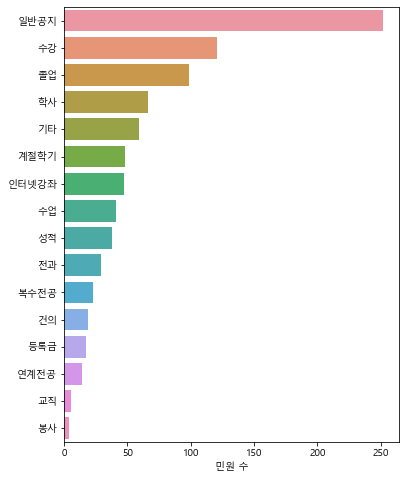

In [338]:
# 대부분 일반공지이며 그 외의 공지는 수강, 졸업, 학사에 관련한 공지임
plt.figure(figsize=(6,8))
sns.barplot(x='민원 수' ,data=type_df, y=type_df.index)

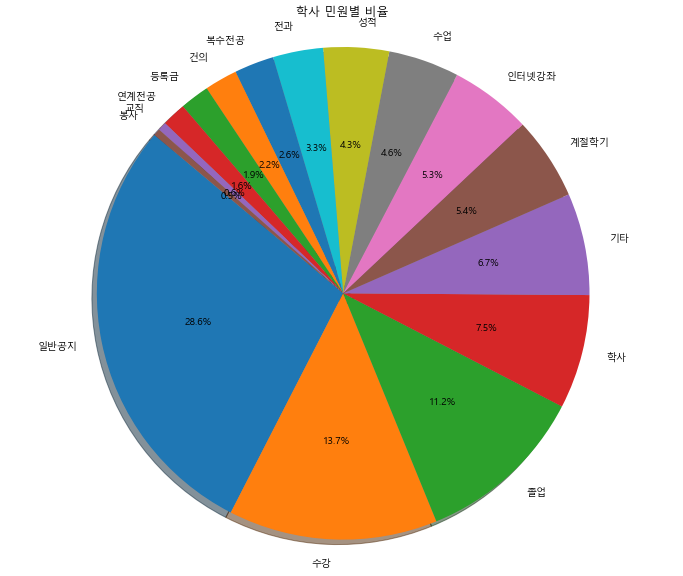

In [343]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.figure(figsize=(12,10))
plt.pie(type_df['비율'], labels=type_df.index,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('학사 민원별 비율')
plt.show()

# 시계열 데이터 분석

In [17]:
df = pd.read_csv("../data/학사민원.csv")

In [19]:
del df['Unnamed: 0']

In [20]:
df

,date,title,type
0,2020.09.08,일반공지 자연캠퍼스 학년도 학기 복지시설 이용안내,일반공지
1,2018.05.03,일반공지 불법 방문판매 행위 예방 안내,일반공지
2,2017.09.28,일반공지 생명을 살리는 자동제세동기 위치 안내,일반공지
3,2017.06.29,일반공지 군학점관련은 학사 군휴학은 휴복학 학생증 증명서 게시판을 이용해주세요,일반공지
4,2020.11.26,기타 인문대학 본배정 희망학과 신청서 제출 관련 새글,기타
...,...,...,...
877,2020.03.16,졸업 인문 졸업학점 문의드립니다,졸업
878,2020.03.16,수강 자연 신청한 과목 교수님 이아닌 다른교수님 강좌가 업로드되어있습니다,수강
879,2020.03.14,수강 자연 재수강신청하느법,수강
880,2020.03.13,전과 자연 온라인 수업 철학과 인간,전과


In [21]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [22]:
df

,date,title,type,year,month,day
0,2020-09-08,일반공지 자연캠퍼스 학년도 학기 복지시설 이용안내,일반공지,2020,9,8
1,2018-05-03,일반공지 불법 방문판매 행위 예방 안내,일반공지,2018,5,3
2,2017-09-28,일반공지 생명을 살리는 자동제세동기 위치 안내,일반공지,2017,9,28
3,2017-06-29,일반공지 군학점관련은 학사 군휴학은 휴복학 학생증 증명서 게시판을 이용해주세요,일반공지,2017,6,29
4,2020-11-26,기타 인문대학 본배정 희망학과 신청서 제출 관련 새글,기타,2020,11,26
...,...,...,...,...,...,...
877,2020-03-16,졸업 인문 졸업학점 문의드립니다,졸업,2020,3,16
878,2020-03-16,수강 자연 신청한 과목 교수님 이아닌 다른교수님 강좌가 업로드되어있습니다,수강,2020,3,16
879,2020-03-14,수강 자연 재수강신청하느법,수강,2020,3,14
880,2020-03-13,전과 자연 온라인 수업 철학과 인간,전과,2020,3,13


In [23]:
df['count'] = 1

In [24]:
group_month_df = df.groupby('month').sum()

In [25]:
group_month_df

,year,day,count
month,,,
3,210080,1902,104
4,78780,656,39
5,197834,809,98
6,343211,3664,170
7,191900,1554,95
8,262600,1826,130
9,339171,2813,168
10,54540,425,27
11,103020,894,51


# 월별 학사 민원 수 변화

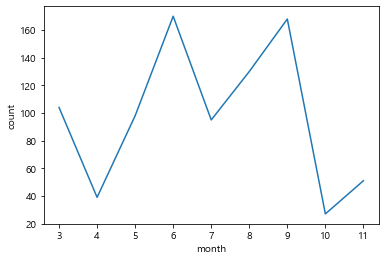

In [26]:
sns.lineplot(data=group_month_df, y='count',x=group_month_df.index)

- 민원이 3월을 시작으로 6월, 9월에 많은것으로 나타남

In [27]:
seoul = pd.read_csv("../data/코로나_이후_명지.csv")
del seoul['Unnamed: 0']
seoul.columns=['recommend','comment','date','title','content']
seoul = seoul.drop([0,1])
for i in range(len(seoul)):
    seoul['date'].iloc[i] = "2020/"+seoul['date'].iloc[i]
seoul = seoul.drop([1955,1956])
seoul['date'] = pd.to_datetime(seoul['date'], format = '%Y-%m-%d %H:%M')
seoul['year'] = seoul['date'].dt.year
seoul['month'] = seoul['date'].dt.month
seoul['day'] = seoul['date'].dt.day
seoul['time'] = seoul['date'].dt.time
seoul['hour'] = seoul['date'].dt.hour
seoul['minute'] = seoul['date'].dt.minute

In [28]:
seoul['count']=1
seoul = seoul.groupby('month').sum()

# 월별 에브리타임 게시물 변화

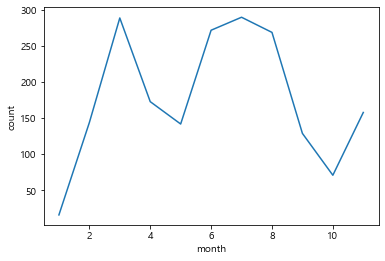

In [29]:
sns.lineplot(data=seoul, x=seoul.index, y='count')

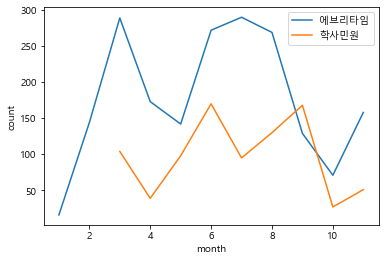

In [30]:
sns.lineplot(data=seoul, x=seoul.index, y='count', label='에브리타임')
sns.lineplot(data=group_month_df, y='count',x=group_month_df.index, label='학사민원')

- 완벽히 일치하진 않으나 증감 추세가 비슷함을 보인다.
- 따라서 학사민원이 많은 시기는 코로나 관련 민원이 많을 것으로 예샹됨
- 7월의 경우는 방학 시기이기 때문에 학사 민원이 적었을 것으로 예상됨

# 워드 클라우드-민원이 많았던 시기를 중심으로

In [31]:
df

,date,title,type,year,month,day,count
0,2020-09-08,일반공지 자연캠퍼스 학년도 학기 복지시설 이용안내,일반공지,2020,9,8,1
1,2018-05-03,일반공지 불법 방문판매 행위 예방 안내,일반공지,2018,5,3,1
2,2017-09-28,일반공지 생명을 살리는 자동제세동기 위치 안내,일반공지,2017,9,28,1
3,2017-06-29,일반공지 군학점관련은 학사 군휴학은 휴복학 학생증 증명서 게시판을 이용해주세요,일반공지,2017,6,29,1
4,2020-11-26,기타 인문대학 본배정 희망학과 신청서 제출 관련 새글,기타,2020,11,26,1
...,...,...,...,...,...,...,...
877,2020-03-16,졸업 인문 졸업학점 문의드립니다,졸업,2020,3,16,1
878,2020-03-16,수강 자연 신청한 과목 교수님 이아닌 다른교수님 강좌가 업로드되어있습니다,수강,2020,3,16,1
879,2020-03-14,수강 자연 재수강신청하느법,수강,2020,3,14,1
880,2020-03-13,전과 자연 온라인 수업 철학과 인간,전과,2020,3,13,1


In [32]:
import datetime as dt

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

- 중복되는 일반공지가 많기에 일반공지 삭제

In [33]:
df = df[df['type']!='일반공지']

In [34]:
df

,date,title,type,year,month,day,count
4,2020-11-26,기타 인문대학 본배정 희망학과 신청서 제출 관련 새글,기타,2020,11,26,1
5,2020-11-26,복수전공 인문 복수전공 부전공 관련 문의 새글,복수전공,2020,11,26,1
6,2020-11-26,계절학기 자연 계절학기 수강에 관해서 문의드립니다 새글,계절학기,2020,11,26,1
7,2020-11-26,수업 인문 전공자유학부 학과 선택 새글,수업,2020,11,26,1
8,2020-11-26,수강 인문 복학 후 재수강 관련 새글,수강,2020,11,26,1
...,...,...,...,...,...,...,...
877,2020-03-16,졸업 인문 졸업학점 문의드립니다,졸업,2020,3,16,1
878,2020-03-16,수강 자연 신청한 과목 교수님 이아닌 다른교수님 강좌가 업로드되어있습니다,수강,2020,3,16,1
879,2020-03-14,수강 자연 재수강신청하느법,수강,2020,3,14,1
880,2020-03-13,전과 자연 온라인 수업 철학과 인간,전과,2020,3,13,1


In [35]:
df1 = df[df['date'] < '2020-05-01']

In [529]:
df1

,date,title,type,year,month,day
683,2020-04-30,성적 자연 재수강,성적,2020,4,30
684,2020-04-29,학사 차 수강철회기간으로 인한 이월학점 관련 질문입니다,학사,2020,4,29
685,2020-04-29,학사 중간고사 오프라인 시험,학사,2020,4,29
690,2020-04-29,기타 조기취업유고결석 관련,기타,2020,4,29
691,2020-04-28,전과 인문 전과 문의,전과,2020,4,28
...,...,...,...,...,...,...
877,2020-03-16,졸업 인문 졸업학점 문의드립니다,졸업,2020,3,16
878,2020-03-16,수강 자연 신청한 과목 교수님 이아닌 다른교수님 강좌가 업로드되어있습니다,수강,2020,3,16
879,2020-03-14,수강 자연 재수강신청하느법,수강,2020,3,14
880,2020-03-13,전과 자연 온라인 수업 철학과 인간,전과,2020,3,13


In [36]:
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import numpy as np

okt = Okt()
train_data = df
train_data[:30] # 상위 5개 출력

train_data = train_data.dropna()

word_list = []

for i in train_data.title:
    word_list.append(i)
    
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)
    
# 명사, 동사, 형용사 사용

noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun"]:
            noun_list.append(word)
            
noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

from collections import Counter
from wordcloud import WordCloud

counts = Counter(noun_list)
tags = counts.most_common(100)



In [37]:
tags

[('인문', 256),
 ('졸업', 180),
 ('자연', 175),
 ('관련', 166),
 ('문의', 162),
 ('수강', 151),
 ('학기', 146),
 ('계절', 113),
 ('전공', 89),
 ('학사', 75),
 ('강의', 73),
 ('질문', 69),
 ('학점', 66),
 ('수업', 64),
 ('기타', 60),
 ('전과', 58),
 ('인터넷', 55),
 ('성적', 55),
 ('강좌', 50),
 ('복수', 47),
 ('재수강', 43),
 ('등록금', 41),
 ('신청', 39),
 ('온라인', 34),
 ('과목', 33),
 ('토익', 24),
 ('건의', 24),
 ('기간', 19),
 ('수강신청', 16),
 ('교양', 15),
 ('취업', 14),
 ('출석', 14),
 ('대해', 13),
 ('평가', 13),
 ('영어', 12),
 ('시험', 12),
 ('제출', 11),
 ('유예', 11),
 ('학생', 11),
 ('인정', 11),
 ('인증', 11),
 ('철회', 11),
 ('이수', 11),
 ('초과', 10),
 ('동계', 9),
 ('조기졸업', 9),
 ('학년', 9),
 ('확인', 9),
 ('문제', 9),
 ('서버', 9),
 ('선택', 8),
 ('모의', 8),
 ('봉사', 8),
 ('회화', 8),
 ('조기', 8),
 ('유고', 8),
 ('결석', 8),
 ('변경', 8),
 ('실습', 7),
 ('입력', 7),
 ('교직', 7),
 ('학교', 7),
 ('과제', 7),
 ('납부', 7),
 ('언제', 7),
 ('폐강', 7),
 ('화상', 7),
 ('대면', 7),
 ('마련', 7),
 ('대학', 6),
 ('관해', 6),
 ('수료', 6),
 ('일정', 6),
 ('공지', 6),
 ('방법', 6),
 ('업로드', 6),
 ('실시간', 6),
 ('추가', 6),
 (

In [38]:
tags = dict(tags)

In [39]:
type(tags)

dict

In [40]:
tags.pop('인문')
tags.pop('자연')
tags.pop('관련')
tags.pop('학기')

146

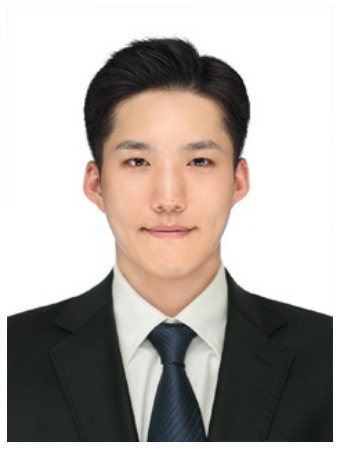

{'졸업': 180, '문의': 162, '수강': 151, '계절': 113, '전공': 89, '학사': 75, '강의': 73, '질문': 69, '학점': 66, '수업': 64, '기타': 60, '전과': 58, '인터넷': 55, '성적': 55, '강좌': 50, '복수': 47, '재수강': 43, '등록금': 41, '신청': 39, '온라인': 34, '과목': 33, '토익': 24, '건의': 24, '기간': 19, '수강신청': 16, '교양': 15, '취업': 14, '출석': 14, '대해': 13, '평가': 13, '영어': 12, '시험': 12, '제출': 11, '유예': 11, '학생': 11, '인정': 11, '인증': 11, '철회': 11, '이수': 11, '초과': 10, '동계': 9, '조기졸업': 9, '학년': 9, '확인': 9, '문제': 9, '서버': 9, '선택': 8, '모의': 8, '봉사': 8, '회화': 8, '조기': 8, '유고': 8, '결석': 8, '변경': 8, '실습': 7, '입력': 7, '교직': 7, '학교': 7, '과제': 7, '납부': 7, '언제': 7, '폐강': 7, '화상': 7, '대면': 7, '마련': 7, '대학': 6, '관해': 6, '수료': 6, '일정': 6, '공지': 6, '방법': 6, '업로드': 6, '실시간': 6, '추가': 6, '환불': 6, '교수': 6, '개선': 6, '요구': 6, '대책': 6, '자유': 5, '학부': 5, '교차': 5, '현장': 5, '이번': 5, '이메일': 5, '공학': 5, '이월': 5, '계획': 5, '일부': 5, '학위': 5, '대하': 5, '오류': 5, '다른': 5, '로그인': 5, '신청서': 4, '복학': 4}


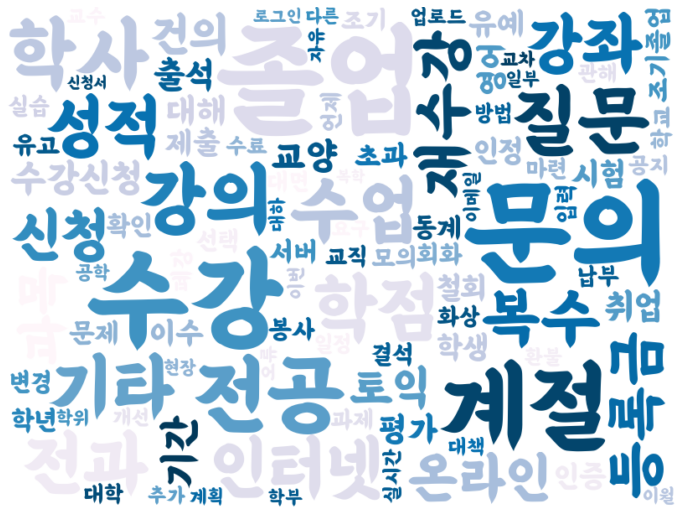

In [44]:
from PIL import Image # 워드클라우드용 마스크를 생성하기위한 라이브러리 import
custom_mask = np.array(Image.open("C:/Users/Kim/Desktop/이력서.jpg"))
plt.figure(figsize=(8,8))
plt.imshow(custom_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

from collections import Counter
from wordcloud import WordCloud

wordcloud = WordCloud(font_path="C:/Users/Kim/Downloads/BMEULJIROTTF.ttf",
                     background_color='white',width=800, height=600,
                     max_words=100, # word의 최대 갯수와 마스크, font-size설정
                     max_font_size=150, colormap='PuBu')
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear') # 마스크용 이미지의 색으로 워드클라우드 생성
plt.show()

- 1, 2분기 이후 학사민원에서도 여전히 인터넷 강의에 개선에 대한 민원이 많았고 등록금과 졸업에 관한 민원도 상당 수 차지한것을 확인

In [482]:
df

,date,title,type,year,month,day
4,2020-11-26,기타 인문대학 본배정 희망학과 신청서 제출 관련 새글,기타,2020,11,26
5,2020-11-26,복수전공 인문 복수전공 부전공 관련 문의 새글,복수전공,2020,11,26
6,2020-11-26,계절학기 자연 계절학기 수강에 관해서 문의드립니다 새글,계절학기,2020,11,26
7,2020-11-26,수업 인문 전공자유학부 학과 선택 새글,수업,2020,11,26
8,2020-11-26,수강 인문 복학 후 재수강 관련 새글,수강,2020,11,26
...,...,...,...,...,...,...
877,2020-03-16,졸업 인문 졸업학점 문의드립니다,졸업,2020,3,16
878,2020-03-16,수강 자연 신청한 과목 교수님 이아닌 다른교수님 강좌가 업로드되어있습니다,수강,2020,3,16
879,2020-03-14,수강 자연 재수강신청하느법,수강,2020,3,14
880,2020-03-13,전과 자연 온라인 수업 철학과 인간,전과,2020,3,13


In [523]:
df2 = df[df['date'] < '2020-05-01']

In [524]:
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import numpy as np

okt = Okt()
train_data = df2
train_data[:30] # 상위 5개 출력

train_data = train_data.dropna()

word_list = []

for i in train_data.title:
    word_list.append(i)
    
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)
    
# 명사, 동사, 형용사 사용

noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun"]:
            noun_list.append(word)
            
noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

from collections import Counter
from wordcloud import WordCloud

counts = Counter(noun_list)
tags = counts.most_common(100)



In [525]:
tags = dict(tags)

In [526]:
tags.pop('인문')
tags.pop('문의')
tags.pop('관련')
tags.pop('자연')

41

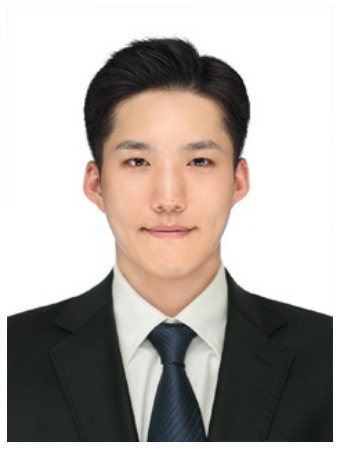

{'수강': 53, '강의': 38, '인터넷': 31, '수업': 28, '강좌': 26, '온라인': 24, '등록금': 19, '졸업': 17, '학기': 11, '건의': 11, '기타': 10, '과목': 10, '재수강': 9, '학사': 9, '학점': 9, '전공': 9, '서버': 8, '제출': 7, '신청': 7, '문제': 7, '마련': 7, '수강신청': 6, '개선': 6, '요구': 6, '대책': 6, '성적': 5, '기간': 5, '전과': 5, '교수': 5, '업로드': 5, '철회': 4, '영어': 4, '계절': 4, '로그인': 4, '과제': 4, '학생': 4, '폐강': 4, '부제': 4, '질문': 3, '중간고사': 3, '유고': 3, '결석': 3, '교차': 3, '학년': 3, '방식': 3, '초과': 3, '인증': 3, '회화': 3, '일부': 3, '환불': 3, '변경': 3, '학교': 3, '해결': 3, '인하': 3, '이월': 2, '조기': 2, '취업': 2, '평가': 2, '실시간': 2, '인정': 2, '토익': 2, '대해': 2, '화상': 2, '가이드라인': 2, '자율': 2, '출석': 2, '오류': 2, '사항': 2, '원서': 2, '공학': 2, '교직': 2, '복수': 2, '신청서': 2, '다른': 2, '여부': 2, '사이버': 2, '방법': 2, '감당': 2, '제발': 2, '얼른': 2, '관리': 2, '오프라인': 1, '시험': 1, '경영': 1, '기한': 1, '연구실': 1, '정기': 1, '안전교육': 1, '참여': 1, '안내': 1, '계열': 1, '원격강좌': 1, '취득': 1, '요건': 1, '뭔가': 1, '앙트레': 1}


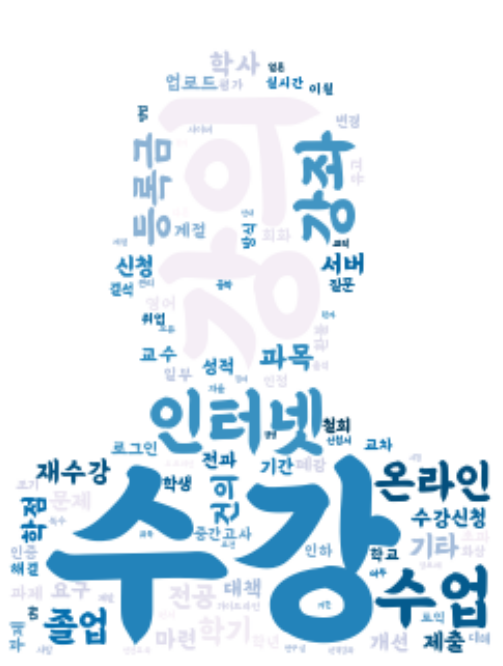

In [527]:
from PIL import Image # 워드클라우드용 마스크를 생성하기위한 라이브러리 import
custom_mask = np.array(Image.open("C:/Users/Kim/Desktop/이력서.jpg"))
plt.figure(figsize=(8,8))
plt.imshow(custom_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

from collections import Counter
from wordcloud import WordCloud

wordcloud = WordCloud(font_path="C:/Users/Kim/Downloads/BMEULJIROTTF.ttf",
                     background_color='white',width=800, height=600,
                     max_words=100, mask=custom_mask, # word의 최대 갯수와 마스크, font-size설정
                     max_font_size=100, colormap='PuBu')
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear') # 마스크용 이미지의 색으로 워드클라우드 생성
plt.show()

- 2020년 1, 2분기에 주 학사민원을 살펴본 결과 온라인 강의에 대한 여러 문제점과 등록금에 관한 민원이 상당수를 차지한 것을 확인

# 결론

- 학사 민원의 카테고리를 살펴본 결과 일반공지를 제외한 것 중 수강, 졸업, 학사에 관련한 문의가 가장 많았다.

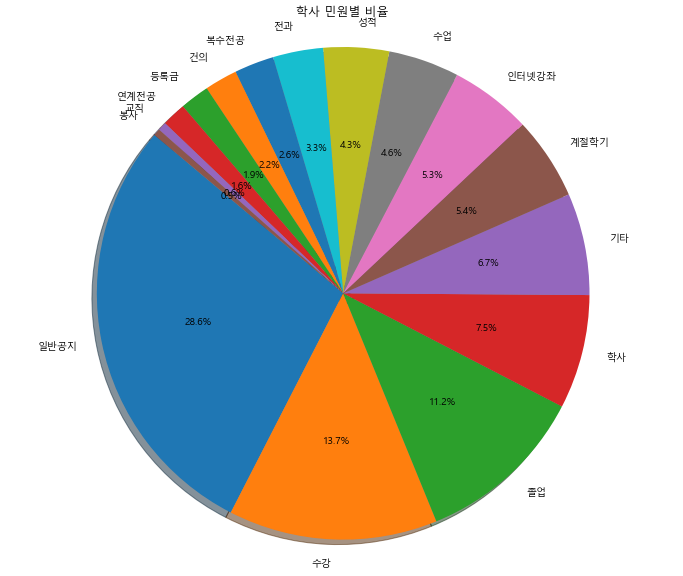

- 약 800건의 학사민원을 스크랩하여 분석한 결과 월별 민원수의 증감 변화가 에브리타임의 게시물 증감의 추세와 비슷한 양상을 띄고있었다.
- 이는 학사 민원 역시 코로나에 관련한 민원이 많았을 것으로 예상됨

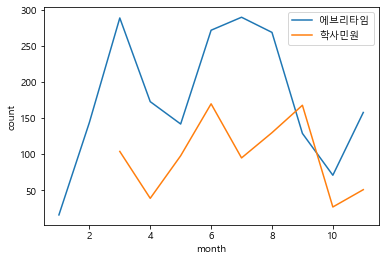

- 2020년 1,2 분기의 학사 민원을 중심으로 워드클라우드 생성
- 주로 인터넷 강의 초기의 문제점에 대한 민원이 많았고 그 의외에 등록금과 관련한 민원이 많았음을 확인

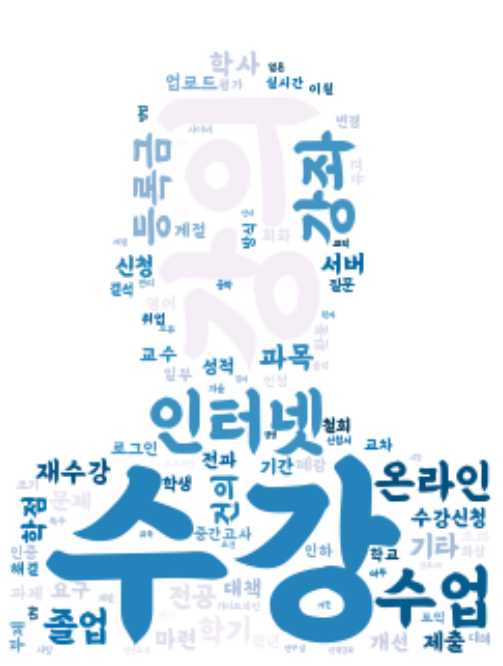

- 3,4분기의 민원을 중심으로 워드클라우드를 생성
- 1,2 분기와 마찬가지로 인터넷 강의와 등록금에 관한 민원이 많았다.
- 추가적으로 졸업에 관련한 문의가 많아진 것을 확인(2학기이기 때문일 수도 있다고 생각)

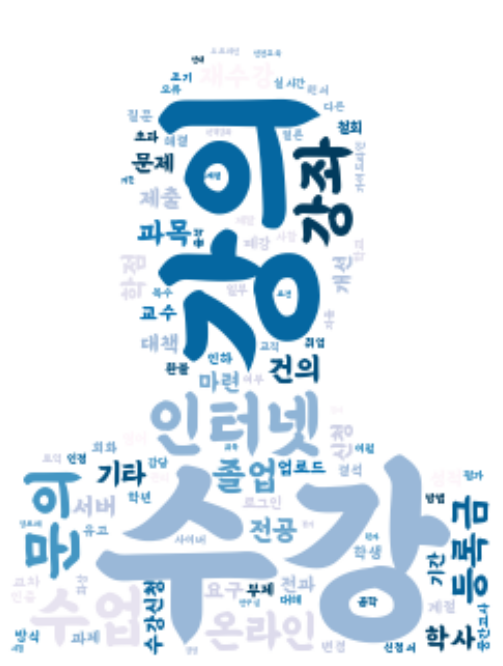